<a href="https://colab.research.google.com/github/pacomm5/Plantillas/blob/main/Regresion%20Lineal%20Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESION LINEAL SIMPLE

# Clonamos el repositorio para obtener los dataSet

In [1]:
#!git clone https://github.com/joanby/machinelearning-az.git
! git clone https://github.com/pacomm5/machinelearning-az # de esta manera lo que hacemos es acceder a todos los datasets mios de github. en este caso de marchine learning de la a a la z

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10541, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 10541 (delta 25), reused 0 (delta 0), pack-reused 10505
Receiving objects: 100% (10541/10541), 311.58 MiB | 29.21 MiB/s, done.
Resolving deltas: 100% (245/245), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')   

Mounted at /content/drive


# Test it

In [4]:
!ls '/content/machinelearning-az' 

'additional materials'	 LICENSE		    README.md
 datasets		 machinelearning-az.Rproj


# Google colab tools

In [5]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive
import sklearn
from sklearn.impute import SimpleImputer

# Plantilla de Pre Procesado

# Cómo importar las librerías


In [6]:
import numpy as np # este para matemáticas. 
import matplotlib.pyplot as plt # este para gráficos
import pandas as pd # perfecta carga, manipular.... datos. 

# Importar el data set


In [10]:
# VAMOS A HACER UNA REGRESSION LINEAL SIMPLE. 

dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 2 - Regression/Section 4 - Simple Linear Regression/Salary_Data.csv')


""" escribiendo código
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 3]"""

' escribiendo código\nX = dataset.iloc[:,:-1].values\ny = dataset.iloc[:, 3]'

In [16]:
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [12]:
X = dataset.iloc[:, :-1].values # años de experiencia son las variables independientes 
y = dataset.iloc[:, 1].values # Salary es la variable dependiente 

In [17]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [20]:
X.shape

(30, 1)

In [18]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [21]:
y.shape

(30,)

In [22]:
dataset.head() # aqui tenemos el dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
X # aqui tenemos un array con todas las filas y todas las columnas menos la última. 

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [24]:
y # aquí tenemos la variable a predecir. 

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

# DATOS FALTANTES

con los datos faltantes podemos hacer muchas cosas. eliminar la columna, la fila, rellenar con un valor, rellenar con la media, con el valor anterior, posterior etc...

In [ ]:
""" NO LO EJECUTAMOS PORQUE NO TENEMOS VALORES FALTANTES"""
from pandas.core import missing
# VAMOS A REMPLAZAR POR LA MEDIA. 
# recordatorio axis = 0 es media de columna si fuera 1 sería por linea. 
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean", verbose=0) # asi lo que hacemos es convertir los valores nan por la media de la columna. 
imputer = imputer.fit(X[:,1:3]) # el objeto que queremos arreglar es la X, le decimos que todas las filas, y acotamos las columnas a las que se lo queremos hacer. recordar ponemos 3 porque coge siempre la anterior. 
# en python la primera columna es 0 y cuando acotamos la última que cogemos siempre ponemos un numero más. 
X[:, 1:3] = imputer.transform(X[:,1:3]) # asi es como definitivamente lo hacemos. 
 
"""
Escribimos código
imputer = SimpleImputer(missing_values= np.nan, strategy= "mean", verbose=0)
imputer = imputer.fit(X[:,1:3])
x[:,1:3] = imputer.transform[X[:,1:3]] """
X # veremos debajo que ha quedado sustituido.

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# DATOS CATEGORICOS TRADUCIR A NUMEROS. 

lo que vamos a hacer estraducir los datos categoriocs a números. ejemplo españa 1, alemania 2 ...

In [ ]:
""" NO LO EJECUTAMOS NO TENEMOS VALORES FALTANTES"""
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# OJOO NO HAY QUE CODIFICARLO ASÍ PORQUE TE LO PONE EN UNA UNICA COLUMNA Y LO PUEDE CONSIDERAR ORDINAL
#labelencoder_X = LabelEncoder() # este es el constructor 
#X[:, 0] = labelencoder_X.fit_transform(X[:, 0]) # sabemos que 0 es la columna de país. 
#X[:,0] # como podemos ver la primera que era Francia la ha codificado como 0, la seguna españa 2, la tercera alemania 1....

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0], dtype=object)

In [ ]:
#X # aqui vemos como lo ha cambiado. el problema que al codificarlo así, va a entender que 0 es menor que 1. es decir la va a considerar como ordinal.....
# ahora debajo vamos a ver las variables dummy. 

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [ ]:
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)


In [ ]:
X = ct.fit_transform(X)
X # vemos que aquí ya lo ha transformado, p

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [25]:
dataset # en el dataset no ha hecho nada sigue igual que en el origen. 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) # random_state es la semilla. 

In [28]:
X_train

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [29]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [30]:
y_train

array([ 56642.,  66029.,  64445.,  61111., 113812.,  91738.,  46205.,
       121872.,  60150.,  39891.,  81363.,  93940.,  57189.,  54445.,
       105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [31]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(10, 1)
(20,)
(10,)


# Escalado de variables

No hace falta porque solo tenemos una variable.

In [ ]:
from sklearn.preprocessing import StandardScaler # esta tenderá a crear una campana de gauss. aglutina valores en torno a la media. 
# la normalización, transforma en 0 y 1

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) # aqui le decimos que escale igual que en X_train. 
# la pregunta sería ¿tenemos que escalar las variables dummy?.  AQUI SI LO HACEMOS. 

In [ ]:
X_train # como vemos al haberlo transformados el 0 1 de los paises se ha convertido en numeros diferentes. 

array([[-1.        ,  2.64575131, -0.77459667,  0.26306757,  0.12381479],
       [ 1.        , -0.37796447, -0.77459667, -0.25350148,  0.46175632],
       [-1.        , -0.37796447,  1.29099445, -1.97539832, -1.53093341],
       [-1.        , -0.37796447,  1.29099445,  0.05261351, -1.11141978],
       [ 1.        , -0.37796447, -0.77459667,  1.64058505,  1.7202972 ],
       [-1.        , -0.37796447,  1.29099445, -0.0813118 , -0.16751412],
       [ 1.        , -0.37796447, -0.77459667,  0.95182631,  0.98614835],
       [ 1.        , -0.37796447, -0.77459667, -0.59788085, -0.48214934]])

In [ ]:
X_test

array([[-1.        ,  2.64575131, -0.77459667, -1.45882927, -0.90166297],
       [-1.        ,  2.64575131, -0.77459667,  1.98496442,  2.13981082]])

In [ ]:
dataset # aui tenemos el dataset original. no se ha modificado nada. 

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# REGRESION LINEAL SIMPLE

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regression = LinearRegression()
regression.fit(X_train, y_train)
# hay que observar que tengan el mismo tamaño. lo hemos visto arriba con shape. 

LinearRegression()

# PREDECIR EL CONJUNTO DE TEST

In [42]:
y_pred = regression.predict(X_test) # utilizamos el predict de Xtest

In [43]:
y_pred # estos representan una recta. 

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [44]:
y_test # estos no son una recta son los reales. 

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

como vemos arriba con la primera persona hemos predecido 40,835 y el real es 37731, el segundo 123079 y el real es 122391 y así sucesivamente. 

# VISUALIZAR LOS DATOS DE ENTRENAMIENTO

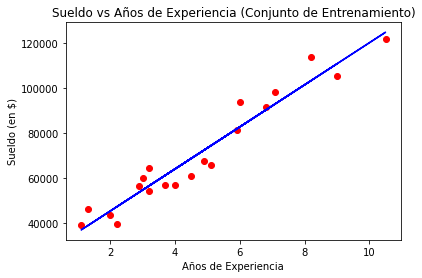

In [45]:
plt.scatter(X_train, y_train, color = "red") # scatter es nube de puntos. 
plt.plot(X_train, regression.predict(X_train), color = "blue") # X_train son los valores de entrenamiento, regression.predict(X_train) es la predicciión en base a los fit de X_train (esto es la y)
plt.title("Sueldo vs Años de Experiencia (Conjunto de Entrenamiento)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()

# visualizar datos de testing

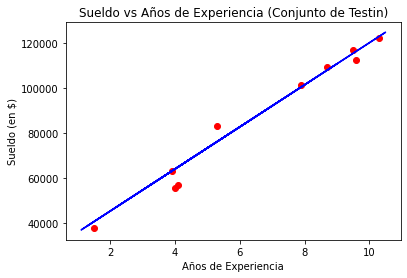

In [47]:
plt.scatter(X_test, y_test, color = "red") # scatter es nube de puntos. 
plt.plot(X_train, regression.predict(X_train), color = "blue") # la recta tiene que ser la misma. 
plt.title("Sueldo vs Años de Experiencia (Conjunto de Testin)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()